In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def MC_I(a, b, N, M, f): # Monte-Carlo Intergration
    
    V = b - a # integration volume
    x = np.zeros((M, N)) 
    
    for i in range(M):
        x[i] = np.random.uniform(a, b, N)
        #creating M sets with N randomly generated points
    
    I_N = V/N * f(x).sum(axis = 1) # MC integral result
    
    deltaN = V * np.std(f(x), axis = 1) /np.sqrt(N-1) # the error of I_N
    
    return I_N, deltaN

In [3]:
lower = 0 # lower integration limit
upper = 1 # upper integration limit
N = 1000 # number of randomly generated points on the interval [a, b)

In [173]:
# (a) M = 1
M = 1 #number of sets

def x4(x): # function to be integrated over [a, b) 
    return x**4

I_a, sigma_a = MC_I(lower, upper, N, M, x4)

I_true_a = (upper)**5/5 - (lower)**5/5 

print(f'The estimation is {I_a}  with the standard error of {sigma_a}')
print(f'|True value - Estimation|/standard error = {(abs(I_true_a-I_a))/sigma_a}')

The estimation is [0.20171948]  with the standard error of [0.00859192]
|True value - Estimation|/standard error = [0.20012707]


In [200]:
# (b) M = 1000
M = 1000

I_b, sigma_b = MC_I(lower, upper, N, M, x4)


In [201]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter 

import scipy.stats 


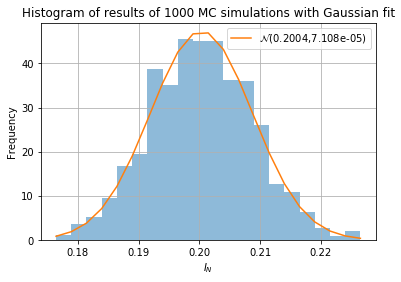

In [215]:
_, bins, _ = plt.hist(I_b, 20, density=1, alpha=0.5)

mu, sigma = scipy.stats.norm.fit(I_b)

best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line, label = '$\mathcal{N}$'f'({mu:.4},{sigma**2:.4})')

plt.title('Histogram of results of 1000 MC simulations with Gaussian fit')
plt.xlabel('$I_N$')
plt.ylabel('Frequency')
plt.grid()
plt.legend()
plt.savefig('MC basics 1.png')
plt.show()

In [210]:
sigma

0.008431123192271205

In [14]:
# (c) 
g1 = lambda x: 2*x
g2 = lambda x: 3*x**2
g3 = lambda x: 4*x**3
g4 = lambda x: 5*x**4

In [15]:
def weights(g, x, N):
    sum = 0
    weight = np.zeros(N)
    for i in range(N):
        weight[i] = g(x[i])
        sum = sum + weight[i]
    
    weight = weight/sum
    return weight

In [52]:
def Importance_MC(f, g, x, N):     # x is a sample of N points randomly sampled according to g(x)
    sigma_N = []                           # storing errors for each sample size from 1 to N=1000
    f_sum = 0
    f_squared_sum = 0
    
    b, a = 1, 0

    for i in range(N):
        f_sum = f_sum + f(x[i])/g(x[i])
        f_ave_squared = np.power(f_sum/(i+1),2)
        f_squared_sum = f_squared_sum + np.power(f(x[i])/g(x[i]), 2)
        f_squared_ave = f_squared_sum/(i+1) 

    if i==0:
        sigma_N.append((b-a)*np.sqrt(f_squared_ave - f_ave_squared))        #error when N = 1
    if i!=0:
        sigma_N.append((b-a)*np.sqrt((f_squared_ave - f_ave_squared)/i))    #error for N>1

    result = (b-a)*f_sum/N
    return sigma_N, result

In [25]:
N = 1000

domain = np.linspace(0, 1, N, endpoint=False) 

In [32]:
w1 = weights(g1, domain, N) 
sample1 = np.random.choice(domain, N, p = w1)

w2 = weights(g2, domain, N)
sample2 = np.random.choice(domain, N, p = w2)

w3 = weights(g3, domain, N)
sample3 = np.random.choice(domain, N, p = w3)

w4 = weights(g4, domain, N)
sample4 = np.random.choice(domain, N, p = w4)

In [53]:
sigmaN1, res1 = Importance_MC(x4, g1, sample1, N)
sigmaN2, res2 = Importance_MC(x4, g2, sample2, N)
sigmaN3, res3 = Importance_MC(x4, g3, sample3, N)
sigmaN4, res4 = Importance_MC(x4, g4, sample4, N)

In [229]:
sigmaN1

[0.004853210511564838]

In [230]:
print(f'N = {N}')
print(f'sigma = {sigmaN1[0]:.4}, I_N = {res1:.4}')
print(f'sigma = {sigmaN2[0]:.4}, I_N = {res2:.4}')
print(f'sigma = {sigmaN3[0]:.4}, I_N = {res3:.4}')
print(f'sigma = {sigmaN4[0]:.4}, I_N = {res4:.4}')

N = 1000
sigma = 0.004853, I_N = 0.2118
sigma = 0.002802, I_N = 0.197
sigma = 0.001292, I_N = 0.2012
sigma = 6.771e-10, I_N = 0.2


In [77]:
sigmaN1_list = []
sigmaN2_list = []
sigmaN3_list = []
sigmaN4_list = []

for i in range(1, N+1):
    sigmaN1_list.append(Importance_MC(x4, g1, sample1, i)[0])
    sigmaN2_list.append(Importance_MC(x4, g2, sample2, i)[0])
    sigmaN3_list.append(Importance_MC(x4, g3, sample3, i)[0])
    sigmaN4_list.append(Importance_MC(x4, g4, sample4, i)[0])


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


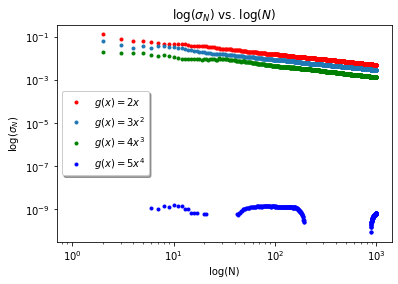

In [217]:
plt.loglog(np.arange(1, N+1),sigmaN1_list,'r.', label = '$g(x)=2x$')
plt.loglog(np.arange(1, N+1),sigmaN2_list, '.', label = '$g(x)=3x^2$')
plt.loglog(np.arange(1, N+1),sigmaN3_list,'g.', label = '$g(x)=4x^3$')
plt.loglog(np.arange(1, N+1),sigmaN4_list,'b.', label = '$g(x)=5x^4$')
plt.xlabel('log(N)')
plt.ylabel('log($\sigma_N$)')
plt.title('log($\sigma_N$) vs. log($N$)')

plt.legend(loc = 'center left', shadow = True)

plt.savefig('MC basics 2.png')
plt.show()